In [1]:
# ! pip install yfinance

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import pandas as pd 

In [3]:
df = pd.read_excel('MCAP31032023_0.xlsx')
sym_comp = df['Symbol']
sym_comp.dropna(inplace=True)
sym_comp.isna().sum()
tickers = []
tickers.extend(sym_comp.values)

In [10]:
# df = yf.download(tickers[1],period='3y')
# f = open('stocksdata.csv','w')
# df.to_csv('stocksdata.csv')
# f.close()
df = pd.read_csv('stocksdata.csv')

In [11]:
dic = {'year':[],'month':[],'date':[]}
lth = len(df.Date)
for i in range(lth):
    lst = df.Date[i].split(sep='-')
    dic['date'].append(lst[2])
    dic['month'].append(lst[1])
    dic['year'].append(lst[0])


In [12]:
dft = pd.DataFrame(dic)
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755 entries, 0 to 754
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    755 non-null    object
 1   month   755 non-null    object
 2   date    755 non-null    object
dtypes: object(3)
memory usage: 17.8+ KB


In [13]:
df['Date'] = pd.to_datetime(dft['date'].astype(str)+'-'+dft['month'].astype(str)+'-'+dft['year'].astype(str)) # feature type is not datetime 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755 entries, 0 to 754
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       755 non-null    datetime64[ns]
 1   Open       755 non-null    float64       
 2   High       755 non-null    float64       
 3   Low        755 non-null    float64       
 4   Close      755 non-null    float64       
 5   Adj Close  755 non-null    float64       
 6   Volume     755 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 41.4 KB
None


C:\Users\q\AppData\Local\Temp\ipykernel_16700\1241734952.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(dft['date'].astype(str)+'-'+dft['month'].astype(str)+'-'+dft['year'].astype(str)) # feature type is not datetime


## __Time_Series_Analysis__

In [14]:
df.set_index('Date',inplace=True)
print(df.head())
df.tail()

            Open  High   Low  Close  Adj Close   Volume
Date                                                   
2020-07-10  9.16  9.72  8.26   8.80       8.80  1731400
2020-08-10  8.77  9.32  8.20   8.57       8.57  1446700
2020-09-10  8.55  8.84  8.38   8.55       8.55   549500
2020-12-10  8.63  8.74  8.42   8.49       8.49   447400
2020-10-13  8.48  9.09  8.30   8.75       8.75   695500


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-02-10,2.22,2.28,2.15,2.21,2.21,725700
2023-03-10,2.18,2.26,2.15,2.15,2.15,411500
2023-04-10,2.16,2.26,2.12,2.18,2.18,395000
2023-05-10,2.14,2.17,1.95,2.03,2.03,656100
2023-06-10,2.00,2.19,2.00,2.11,2.11,396200


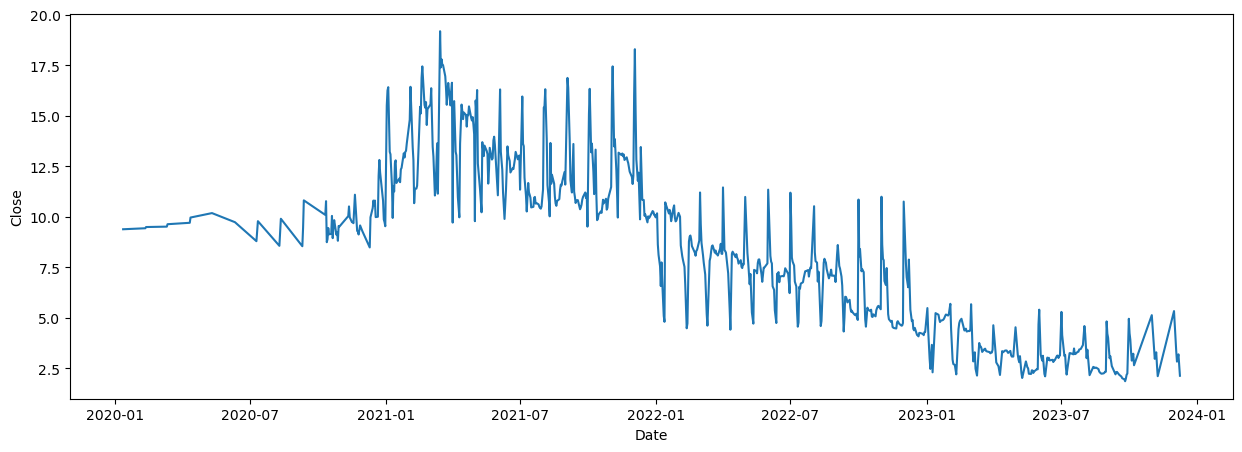

In [15]:
plt.figure(figsize=(15,5))
sns.lineplot(data=df,x=df.index,y=df['Close'])
plt.show()

In [16]:
# calcaulate the plot of rolling mean and standard deviation
df['rollMean'] = df['Close'].rolling(window=20).mean() ## window = 12 parameter shiftes the time by 12 column
df['rollStd'] = df['Close'].rolling(window=20).std()

In [17]:
print(df['rollMean'])
print(df['rollStd']) # it will take rolling mean after first 12 values

Date
2020-07-10       NaN
2020-08-10       NaN
2020-09-10       NaN
2020-12-10       NaN
2020-10-13       NaN
               ...  
2023-02-10    2.1535
2023-03-10    2.1475
2023-04-10    2.1450
2023-05-10    2.1365
2023-06-10    2.1335
Name: rollMean, Length: 755, dtype: float64
Date
2020-07-10         NaN
2020-08-10         NaN
2020-09-10         NaN
2020-12-10         NaN
2020-10-13         NaN
                ...   
2023-02-10    0.117665
2023-03-10    0.114426
2023-04-10    0.113067
2023-05-10    0.115087
2023-06-10    0.114950
Name: rollStd, Length: 755, dtype: float64


In [18]:
df.head(5)

,Open,High,Low,Close,Adj Close,Volume,rollMean,rollStd
Date,,,,,,,,
2020-07-10,9.16,9.72,8.26,8.80,8.80,1731400,NaN,NaN
2020-08-10,8.77,9.32,8.20,8.57,8.57,1446700,NaN,NaN
2020-09-10,8.55,8.84,8.38,8.55,8.55,549500,NaN,NaN
2020-12-10,8.63,8.74,8.42,8.49,8.49,447400,NaN,NaN
2020-10-13,8.48,9.09,8.30,8.75,8.75,695500,NaN,NaN


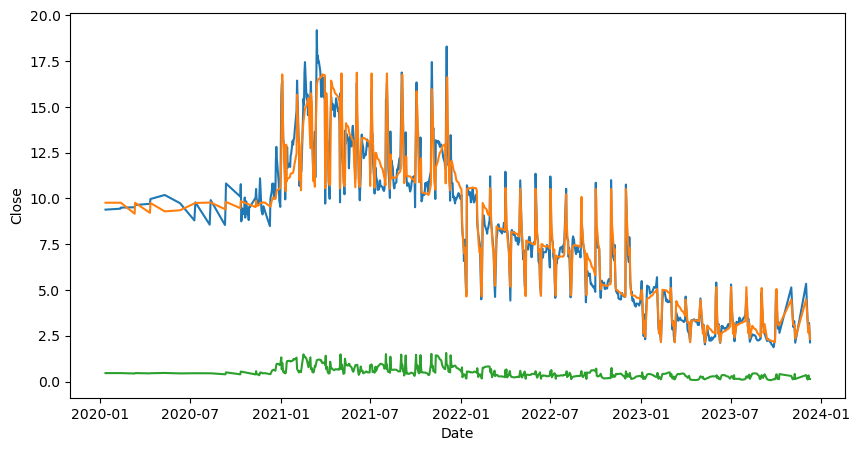

In [19]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df,x=df.index,y=df['Close'])
sns.lineplot(data=df,x=df.index,y=df['rollMean'])
sns.lineplot(data=df,x=df.index,y=df['rollStd'])
plt.show()

In [20]:
# conclusion : Mean is not stationary , SD is not stationary; so our data is not stationary
# Now let us perform the ADF test 

In [21]:
from statsmodels.tsa.stattools import adfuller
adfTest = adfuller(df['Close'])
adfTest
# Interpret these value below by converting into series

(-0.4917226025932008,
 0.8936216785837272,
 13,
 741,
 {'1%': -3.4392057325732104,
  '5%': -2.8654483492874236,
  '10%': -2.5688512291811225},
 646.6507575764717)

In [22]:
stats = pd.Series(adfTest[0:4],index=['Test Statistics','p-value','#lags used','number of observation'])
stats

Test Statistics           -0.491723
p-value                    0.893622
#lags used                13.000000
number of observation    741.000000
dtype: float64

In [23]:
for key, values in adfTest[4].items():
    print('critically',key,':',values)

critically 1% : -3.4392057325732104
critically 5% : -2.8654483492874236
critically 10% : -2.5688512291811225


In [24]:
def test_stationary(df,var):
    df['rollMean'] = df[var].rolling(window=12).mean() ## window = 12 parameter shiftes the time by 12 column
    df['rollStd'] = df[var].rolling(window=12).std()
    from statsmodels.tsa.stattools import adfuller
    adfTest = adfuller(df[var])
    stats = pd.Series(adfTest[0:4],index=['Test Statistics','p-value','#lags used','number of observation'])
    print(stats)
    for key, values in adfTest[4].items():
        print('critically',key,':',values)
    plt.figure(figsize=(10,5))
    sns.lineplot(data=df,x=df.index,y=var)
    sns.lineplot(data=df,x=df.index,y='rollMean')
    sns.lineplot(data=df,x=df.index,y='rollStd')
    plt.show()

Test Statistics           -0.491723
p-value                    0.893622
#lags used                13.000000
number of observation    741.000000
dtype: float64
critically 1% : -3.4392057325732104
critically 5% : -2.8654483492874236
critically 10% : -2.5688512291811225


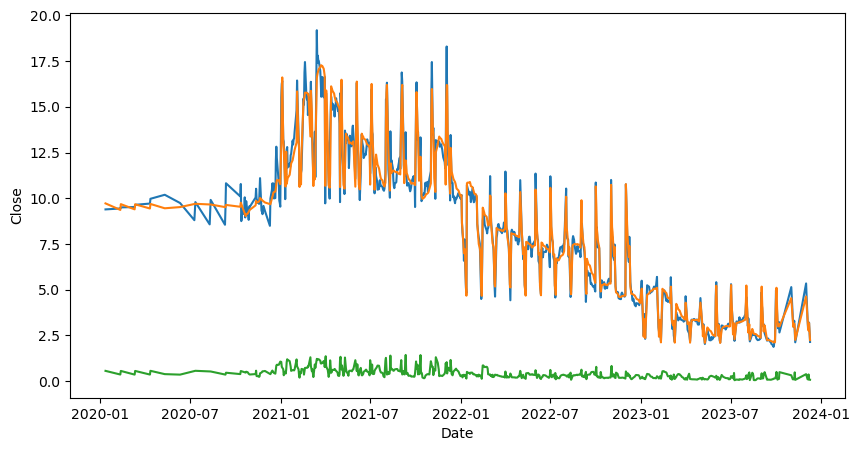

In [25]:
test_stationary(df,'Close')

In [26]:
tcs_df = df[['Close']].copy() # double bracket cuz its list within a list
tcs_df.head()

,Close
Date,
2020-07-10,8.80
2020-08-10,8.57
2020-09-10,8.55
2020-12-10,8.49
2020-10-13,8.75


In [27]:
def shift(x):
    tcs_df = df[['Close']].copy()
    tcs_df['shift'] = tcs_df.Close.shift(x) # create a new column which will contain shifted value from Close 
    tcs_df['shiftDiff'] = tcs_df['Close'] - tcs_df['shift']
    # print(tcs_df.sample(20))
    shifted_Data = tcs_df.dropna()
    return shifted_Data

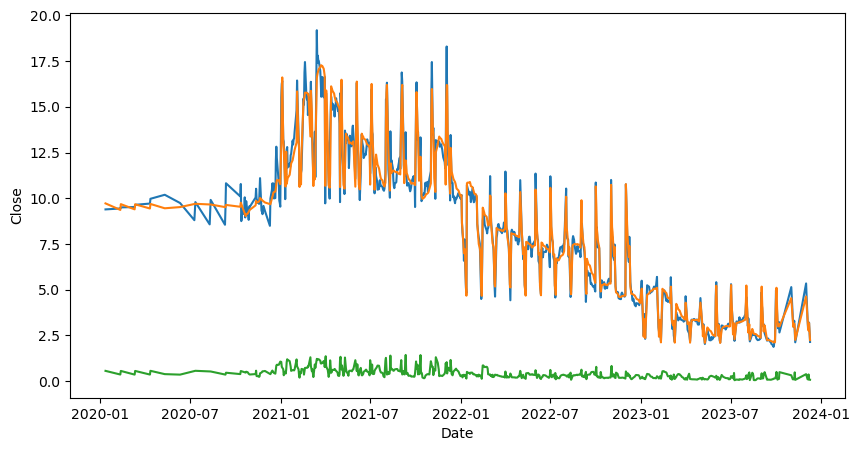

In [28]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df,x=df.index,y=df['Close'])
sns.lineplot(data=df,x=df.index,y=df['rollMean'])
sns.lineplot(data=df,x=df.index,y=df['rollStd'])
plt.show()

In [29]:
shifted_Data = shift(1)
shifted_Data

,Close,shift,shiftDiff
Date,,,
2020-08-10,8.57,8.80,-0.23
2020-09-10,8.55,8.57,-0.02
2020-12-10,8.49,8.55,-0.06
2020-10-13,8.75,8.49,0.26
2020-10-14,8.90,8.75,0.15
...,...,...,...
2023-02-10,2.21,2.25,-0.04
2023-03-10,2.15,2.21,-0.06
2023-04-10,2.18,2.15,0.03


Test Statistics         -7.004678e+00
p-value                  7.172789e-10
#lags used               1.200000e+01
number of observation    7.410000e+02
dtype: float64
critically 1% : -3.4392057325732104
critically 5% : -2.8654483492874236
critically 10% : -2.5688512291811225


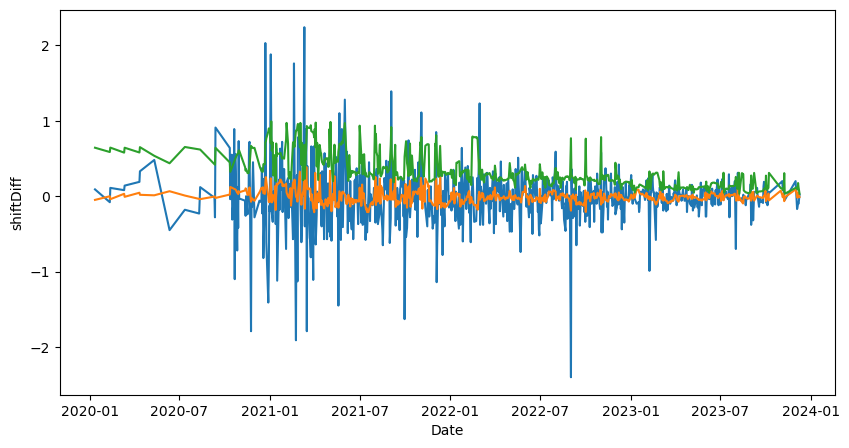

In [30]:
test_stationary(shifted_Data,'shiftDiff')

# Interpret these value below by converting into series

### __ARIMA__

In [31]:
tcs = df[['Close']].copy(deep=True)
tcs['FirstDiff'] = tcs[['Close']].diff(1) # for ARIMA
#tcs['FirstDiff'] = tcs[['Close']].diff(12) # for

In [32]:
print(tcs.head())

            Close  FirstDiff
Date                        
2020-07-10   8.80        NaN
2020-08-10   8.57      -0.23
2020-09-10   8.55      -0.02
2020-12-10   8.49      -0.06
2020-10-13   8.75       0.26


In [33]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

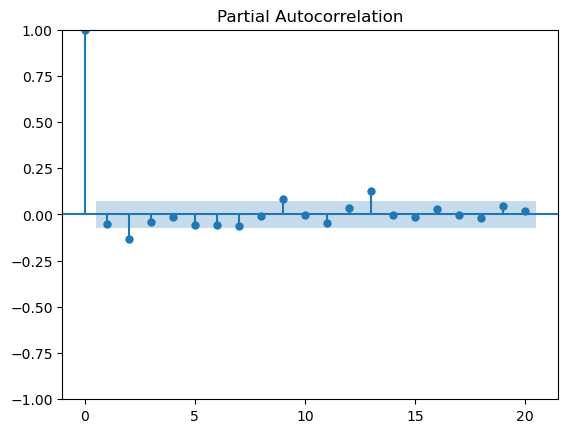

In [34]:
plot_pacf(tcs['FirstDiff'].dropna(),lags=20)
plt.show()

* the shaded area is insignificant area
* PACF gives us the auto regressive values
* frist 'p' is 1 (the axis co-ordinate), whoes value is ~0.31 (the y-axis co-ordinate)
* so, significant P values are 1 ,2 ,3, 4, etc  

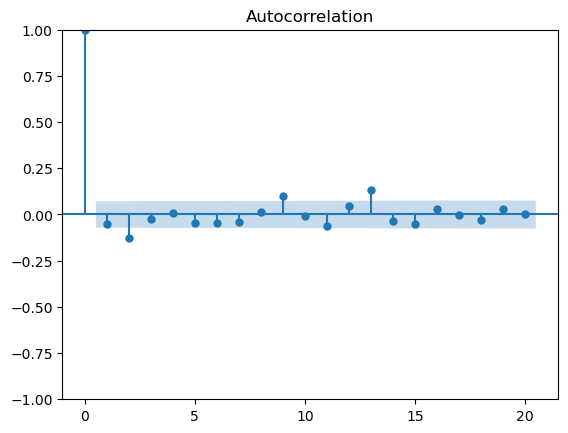

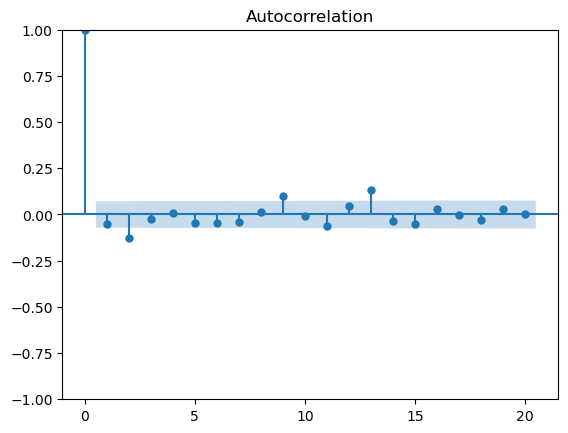

In [35]:
plot_acf(tcs['FirstDiff'].dropna(),lags=20)

In [42]:
tcs.sort_index()

,Close,FirstDiff
Date,,
2020-01-12,9.39,0.090000
2020-02-11,9.44,-0.080001
2020-02-12,9.50,0.110000
2020-03-11,9.52,0.080001
2020-03-12,9.64,0.140000
...,...,...
2023-12-04,3.35,-0.170000
2023-12-05,2.84,-0.140000
2023-12-06,3.02,-0.090000


In [43]:
# Results of ACF are similar to that of PACF
# Interpretation: We got q. Significant q values are 1, 3, 4, 8, etc) 

# Let us take p = 1, q = 3 (both are significant) and d = 1 (already known)

# Build ARIMA model
train = tcs[:round(len(tcs)*70/100)] # Take the first 70% data
print(train.tail()) # Just to check where it ends

test = tcs[round(len(tcs)*70/100):] # Take the last 30% data, starting from 71%
print(test.head()) # Just to check where it starts

model = ARIMA(train['Close'],order=(3,1,3)) # Parameters: p, d, q
model_fit = model.fit()
prediction = model_fit.predict(start=test.index[1],end=test.index[-1], freq = None)
tcs['arimaPred'] = prediction
print(tcs.tail())

# Plot

sns.lineplot(data=tcs,x=tcs.index,y='Close')
sns.lineplot(data=tcs,x=tcs.index,y='arimaPred')
plt.show()

# Conclusion: The ARIMA prediction is not good



            Close  FirstDiff
Date                        
2022-03-11   4.62       0.13
2022-04-11   4.42      -0.20
2022-07-11   4.57       0.15
2022-08-11   4.60       0.03
2022-09-11   4.33      -0.27
            Close  FirstDiff
Date                        
2022-10-11   4.57       0.24
2022-11-11   4.94       0.37
2022-11-14   4.80      -0.14
2022-11-15   4.86       0.06
2022-11-16   4.55      -0.31


c:\Users\q\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\q\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\q\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\q\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\q\anaconda3\Lib\site-packages\statsmodels

KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

In [41]:
test.loc['2022-11-11']

Close        4.94
FirstDiff    0.37
Name: 2022-11-11 00:00:00, dtype: float64

   Close
0   8.80
1   8.57
2   8.55
3   8.49
4   8.75


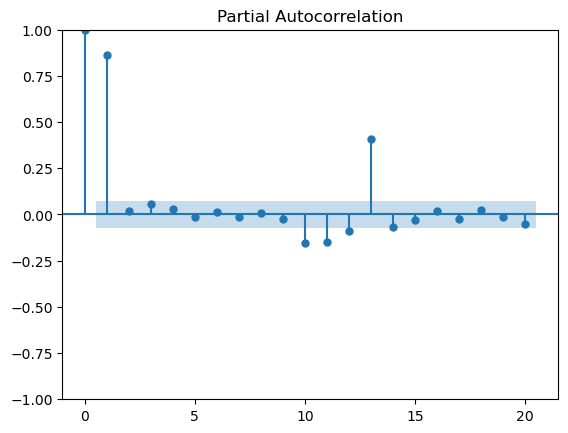

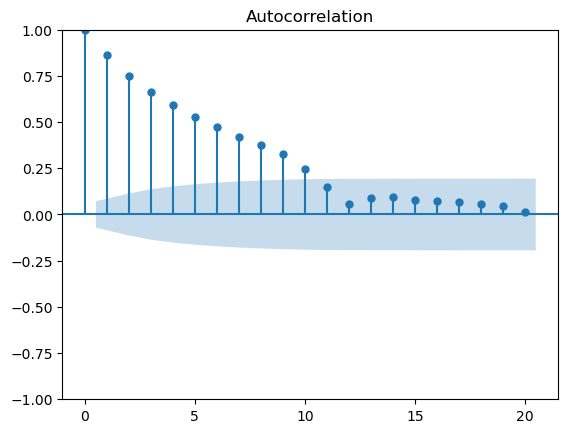

In [ ]:
tcs = df[['Close']].copy(deep=True)
print(tcs.head())

# Create columns for one month and one year lagged data
tcs['firstDiff'] = tcs['Close'].diff()
tcs['Diff12'] = tcs['Close'].diff(12) # This will show nulls to start with

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_pacf(tcs['Diff12'].dropna(),lags=20)
plt.show() 

plot_acf(tcs['Diff12'].dropna(),lags=20)
plt.show()

In [ ]:
train = tcs[:round(len(tcs)*70/100)] # Take the first 70% data
test = tcs[round(len(tcs)*70/100):] # Take the last 30% data, starting from 71%

# First ARIMA prediction
model = ARIMA(train['Close'],order=(3,1,3)) # Parameters: p, d, q
model_fit = model.fit()
prediction = model_fit.predict(start=test.index[0],end=test.index[-1])
tcs['arimaPred'] = prediction

# Now SARIMAX prediction
model = SARIMAX(train['Close'],order=(3,1,3),seasonal_order=(2,1,2,60))
model_fit = model.fit()
prediction = model_fit.predict(start=test.index[0],end=test.index[-1])
tcs['sarimaxPred'] = prediction
print(tcs.tail())

c:\Users\q\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\q\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


KeyboardInterrupt: 

   Close  firstDiff  Diff12  arimaPred  sarimaxPred
0   8.80        NaN     NaN        NaN          NaN
1   8.57      -0.23     NaN        NaN          NaN
2   8.55      -0.02     NaN        NaN          NaN
3   8.49      -0.06     NaN        NaN          NaN
4   8.75       0.26     NaN        NaN          NaN


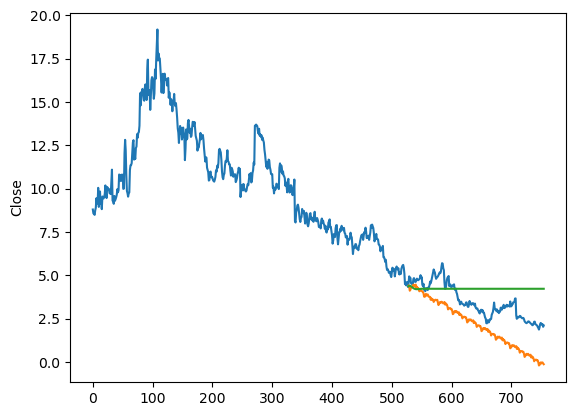

In [ ]:
# Data looks better

# Plot
tcs.dropna()
print(tcs.head())
sns.lineplot(data=tcs,x=tcs.index,y='Close')
sns.lineplot(data=tcs,x=tcs.index,y='sarimaxPred')
sns.lineplot(data=tcs,x=tcs.index,y='arimaPred')
plt.show()

In [ ]:
# Compared to ARIMA, SARIMAX is much better

# Future prediction

# First check the last date in our dataset
print(tcs.tail())

# MS: Month Start frequency
# Create a data frame to hold index values from 01.01.61 to 01.12.62
futureDate = pd.DataFrame(pd.date_range(start='1961-01-01', end='1965-12-01',freq='MS'),columns=['Dates'])
futureDate.set_index('Dates',inplace=True)
print(futureDate.head())

# Predict and print
print(model_fit.predict(start=futureDate.index[0],end=futureDate.index[-1]))

In [ ]:

# Plot

tcs.dropna()
sns.lineplot(data=tcs,x=tcs.index,y='Close')
sns.lineplot(data=tcs,x=tcs.index,y='sarimaxPred')
sns.lineplot(data=tcs,x=tcs.index,y='arimaPred')
model_fit.predict(start=futureDate.index[0],end=futureDate.index[-1]).plot(color='black')
plt.show()
